# Image reconstruction using back projection algorithm
----
`Roll: CS20B1016, Name: V Nagasai`

----

**<u>Problem Statement:</u>**

Create a concentric square image, with inner square pixel intensity values as 125 and outer
square as 0 everywhere. Find the projection along the row, column, diagonal with 45 degree
and 135 degree. Reconstruct the image by applying back projection algorithm using the
following ways:
1. the row projection only
2. the row and column projections
3. the row and column and diagonal 45-degree projections
4. the row and column and diagonal 45- and 135-degree projections

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Size of image
size = 200
# Create a numpy array filled with zeros
image = np.zeros((size, size))

In [3]:
# Set the inner square to 125
inner_size = size // 2
start = (size - inner_size) // 2
end = start + inner_size
image[start:end, start:end] = 125

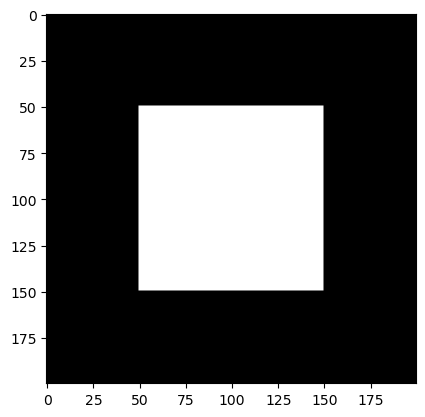

In [4]:
# display of the image
plt.imshow(image, cmap='gray')
plt.show()

In [5]:
# Finding the projection along the row, column, diagonal with 45 degree and 135 degree
import numpy as np
import matplotlib.pyplot as plt

In [6]:
# Compute the row projection
row_projection = np.sum(image, axis=1)

In [7]:
# # Compute the coloumn projection
col_projection = np.sum(image, axis=0)

In [8]:
# Compute the diagonal projection with 45 degree
diag45_projection = [np.sum(np.diagonal(image, offset=i)) for i in range(-size+1, size)]

In [9]:
# Compute the diagonal projection with 135 degree
diag135_projection = [np.sum(np.diagonal(np.fliplr(image), offset=i)) for i in range(-size+1,
size)]

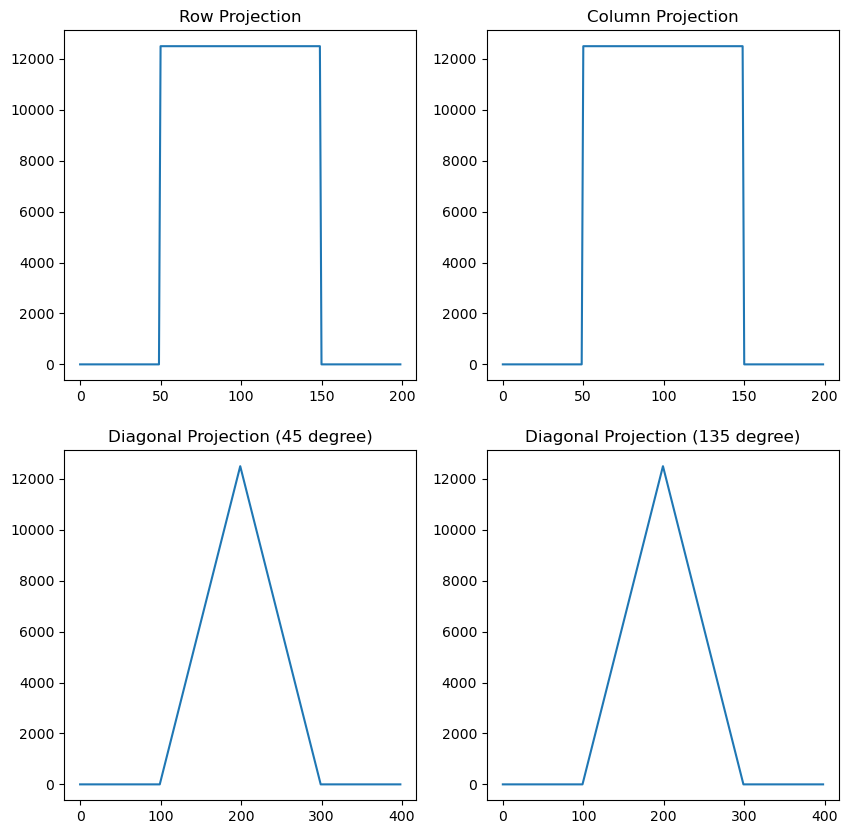

In [10]:
# Display the projections
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].plot(row_projection)
axs[0, 0].set_title('Row Projection')
axs[0, 1].plot(col_projection)
axs[0, 1].set_title('Column Projection')
axs[1, 0].plot(diag45_projection)
axs[1, 0].set_title('Diagonal Projection (45 degree)')
axs[1, 1].plot(diag135_projection)
axs[1, 1].set_title('Diagonal Projection (135 degree)')
plt.show()

In [11]:
# Image reconstruction using back projection algorithm
import numpy as np
import matplotlib.pyplot as plt
size = 200

In [12]:
# Create a numpy array filled with zeros
image = np.zeros((size, size))

In [13]:
# Set the inner square to 125
inner_size = size // 2
start = (size - inner_size) // 2
end = start + inner_size
image[start:end, start:end] = 125

In [14]:
# Compute the row, column, diagonal 45 degree, and diagonal 135 degree projections
row_projection = np.sum(image, axis=1)
col_projection = np.sum(image, axis=0)
diag45_projection = [np.sum(np.diagonal(image, offset=i)) for i in range(-size+1, size)]
diag135_projection = [np.sum(np.diagonal(np.fliplr(image), offset=i)) for i in range(-size+1,
size)]


In [15]:
# Reconstruct the image using the row projection only
reconstruction1 = np.zeros((size, size))
for i in range(size):
 reconstruction1[i,:] += row_projection[i]

In [16]:
# Reconstruct the image using the row and column projections
reconstruction2 = np.zeros((size, size))
for i in range(size):
 reconstruction2[i,:] += row_projection[i]
 reconstruction2[:,i] += col_projection[i]

In [17]:
# Reconstruct the image using the row, column, and diagonal 45 degree projections
reconstruction3 = np.zeros((size, size))
for i in range(size):
 reconstruction3[i,:] += row_projection[i]
 reconstruction3[:,i] += col_projection[i]
 for j in range(-size+1, size):
       if i+j >= 0 and i+j < size:
               reconstruction3[i,:] += diag45_projection[j+size-1]

In [18]:
# Reconstruct the image using the row, column, and diagonal 45 and 135 degree projections
reconstruction4 = np.zeros((size, size))
for i in range(size):
 reconstruction4[i,:] += row_projection[i]
 reconstruction4[:,i] += col_projection[i]
 for j in range(-size+1, size):
         if i+j >= 0 and i+j < size:
                  reconstruction4[i,:] += diag45_projection[j+size-1]
                  reconstruction4[i,:] += diag135_projection[j+size-1]

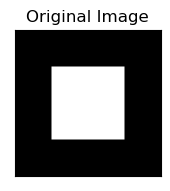

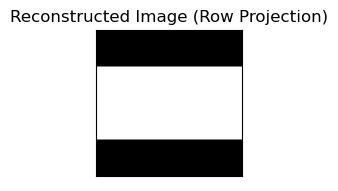

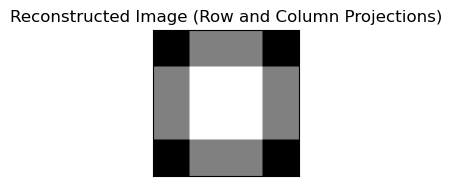

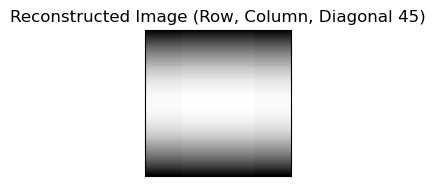

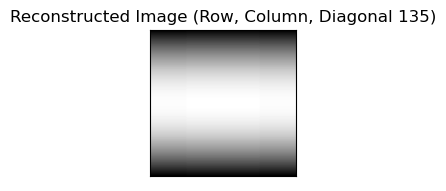

In [19]:
# Display the original and reconstructed images
images =[image,reconstruction1,reconstruction2,reconstruction3,reconstruction4]
titles=['Original Image','Reconstructed Image (Row Projection)',
        'Reconstructed Image (Row and Column Projections)','Reconstructed Image (Row, Column, Diagonal 45)',
        'Reconstructed Image (Row, Column, Diagonal 135)']
for i in range(5):
 plt.subplot(2,3,i+1)
 plt.imshow (images[i],cmap='gray')
 plt.title(titles[i])
 plt.xticks([]),
 plt.yticks([])
 plt.show()